In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [43]:
signal = step_signal(-3,3,n=100)
print(max(signal), min(signal))
print(signal.mean())

3.1997887142512917 -3.1999974290217477
0.15953574841328683


In [44]:
zero_1 = round((max(signal) + min(signal) )/2,4)

In [45]:
zero = round(signal.mean(),4)

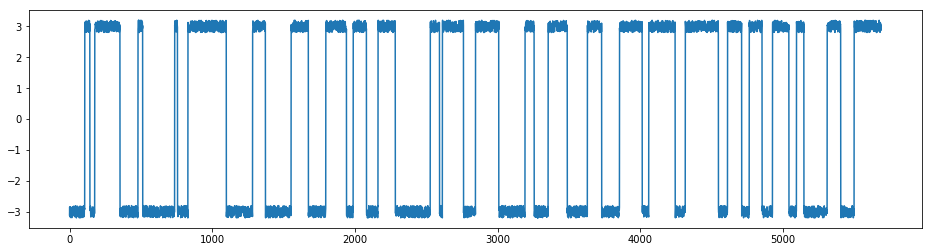

In [46]:
plt.figure(figsize=(16,4))
plt.plot(signal)

In [47]:
def parametros (U):
    U_max = max(abs(U))
    t = np.argmax(abs(U))
    P = 2*np.exp(-6*max(abs(U)**2)/((len(signal)**2)+(len(signal)**3)))
    condicao = P < 0.01
    parametros = {
        'Ut': U_max,
        't': t,
        'P': P,
        'P < a': condicao
        }
    return parametros

In [48]:
def step_1(signal):
    v = []
    for i in np.arange(1,len(signal)):
        v.append(np.sum(np.sign(signal[i]-signal)))
    
    return np.cumsum(v)

In [59]:
def step_2(signal,t):
    #print('entreistep')
    signal_1 = signal[0:t-1]
    signal_2 = signal[t:len(signal)]
    U1 = step_1(signal_1)
    U2 = step_1(signal_2)
    par_1 = parametros(U1)
    par_2 = parametros(U2)
    #print(par_1, par_2)
    if par_1['P < a']:
        print(par_1)
        step_2(signal_1,par_1['t'])
    elif par_2['P < a']:
        print(par_2)
        step_2(signal_2,par_2['t'])
#     else:
#         return par_1, par_2

In [60]:
U = step_1(signal)
par = parametros(U)
par['P < a']
print(step_2(signal,par['t']))

{'Ut': 408200.0, 't': 828, 'P': 0.008750604918050384, 'P < a': True}
{'Ut': 412826.0, 't': 269, 'P': 0.007731570323730719, 'P < a': True}
None


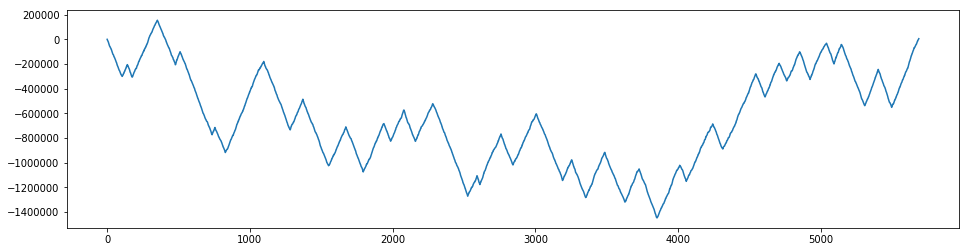

In [61]:
plt.figure(figsize=(16,4))
plt.plot(U)

In [62]:
U_max = max(abs(U))
t = np.argmax(abs(U))
P = 2*np.exp(-6*max(abs(U)**2)/((len(signal)**2)+(len(signal)**3)))
print(U_max, t, P)
P < 0.01

1447273.0 3852 4.437725671038772e-30


True

In [63]:
signal_1 = signal[0:t-1]
v1 = []
for i in np.arange(1,len(signal_1)):
    v1.append(np.sum(np.sign(signal_1[i]-signal_1)))

U1 = np.cumsum(v1)

408200.0 828 5.0167623742055626e-08


True

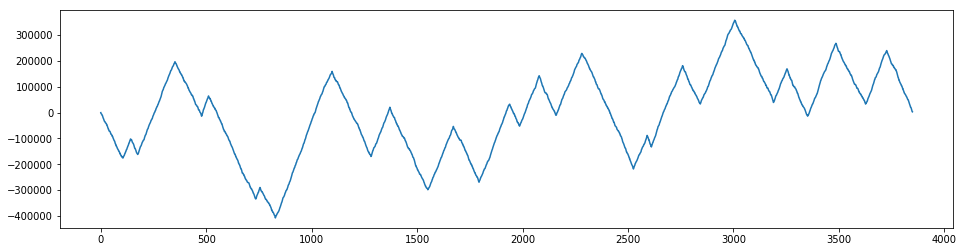

In [64]:
plt.figure(figsize=(16,4))
plt.plot(U1)

U1_max = max(abs(U1))
t_new1 = np.argmax(abs(U1))
P1 = 2*np.exp(-6*max(abs(U1)**2)/((len(signal_1)**2)+(len(signal_1)**3)))
print(U1_max, t_new1, P1)
P1 < 0.01

In [65]:
signal_2 = signal[t:len(signal)]
v2 = []
for i in np.arange(1,len(signal_2)):
    v2.append(np.sum(np.sign(signal_2[i]-signal_2)))

U2 = np.cumsum(v2)

192448.0 691 5.199868299489635e-16


True

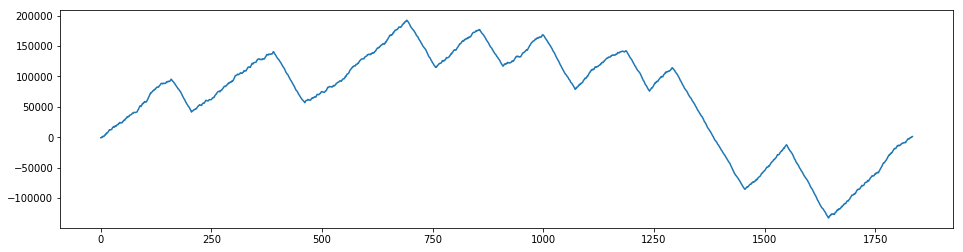

In [66]:
plt.figure(figsize=(16,4))
plt.plot(U2)

U2_max = max(abs(U2))
t_new2 = np.argmax(abs(U2))
P2 = 2*np.exp(-6*max(abs(U2)**2)/((len(signal_2)**2)+(len(signal_2)**3)))
print(U2_max, t_new2, P2)
P2 < 0.01